In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option("display.max_columns", None)

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [3]:
training_features = pd.read_csv("../data/training_set_features.csv")
training_labels = pd.read_csv("../data/training_set_labels.csv")

In [4]:
training_features.shape

(26707, 36)

In [5]:
training_features["household_adults"].max()

3.0

In [5]:
training_labels.shape

(26707, 3)

In [6]:
training_df = pd.merge(training_features, training_labels, on="respondent_id")
training_df.shape

(26707, 38)

In [185]:
training_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
respondent_id                  26707 non-null int64
h1n1_concern                   26615 non-null float64
h1n1_knowledge                 26591 non-null float64
behavioral_antiviral_meds      26636 non-null float64
behavioral_avoidance           26499 non-null float64
behavioral_face_mask           26688 non-null float64
behavioral_wash_hands          26665 non-null float64
behavioral_large_gatherings    26620 non-null float64
behavioral_outside_home        26625 non-null float64
behavioral_touch_face          26579 non-null float64
doctor_recc_h1n1               24547 non-null float64
doctor_recc_seasonal           24547 non-null float64
chronic_med_condition          25736 non-null float64
child_under_6_months           25887 non-null float64
health_worker                  25903 non-null float64
health_insurance               14433 non-null float64
opinion_h1n1_vacc_effective  

In [186]:
training_df[training_df["chronic_med_condition"].isna()]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
64,64,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,2.0,3.0,NaN,NaN,45 - 54 Years,NaN,Other or Multiple,Female,NaN,NaN,NaN,NaN,kbazzjca,Non-MSA,1.0,2.0,NaN,NaN,0,0
175,175,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,2.0,3.0,1.0,1.0,65+ Years,NaN,White,Female,NaN,NaN,NaN,NaN,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,1
183,183,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5.0,1.0,2.0,2.0,1.0,NaN,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,lrircsnp,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0
203,203,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18 - 34 Years,NaN,White,Female,NaN,NaN,NaN,NaN,lrircsnp,Non-MSA,0.0,0.0,NaN,NaN,1,1
205,205,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,2.0,4.0,5.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,bhuqouqj,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26580,26580,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,4.0,4.0,5.0,5.0,4.0,5.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0
26595,26595,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,4.0,4.0,4.0,4.0,5.0,4.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,hodpvpew,1,1
26608,26608,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,NaN,Other or Multiple,Female,NaN,NaN,NaN,NaN,lrircsnp,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0
26639,26639,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,4.0,4.0,4.0,4.0,1.0,4.0,65+ Years,NaN,Hispanic,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0


In [187]:
column_name = []
h1n1_ratio_null = []
h1n1_ratio_no_null = []
h1n1_ratio = []
for c in training_df.columns:
    yes_h1n1_null = sum(training_df[training_df[c].isnull()]["h1n1_vaccine"]==1)
    no_h1n1_null = sum(training_df[training_df[c].isnull()]["h1n1_vaccine"]==0)
    
    yes_h1n1_no_null = sum(training_df[training_df[c].isnull() == False]["h1n1_vaccine"]==1)
    no_h1n1_no_null = sum(training_df[training_df[c].isnull() == False]["h1n1_vaccine"]==0)
    
    if no_h1n1_null > 0:
        column_name.append(c)
        h1n1_ratio_no_null.append(yes_h1n1_no_null/no_h1n1_no_null)
        h1n1_ratio_null.append(yes_h1n1_null/no_h1n1_null)

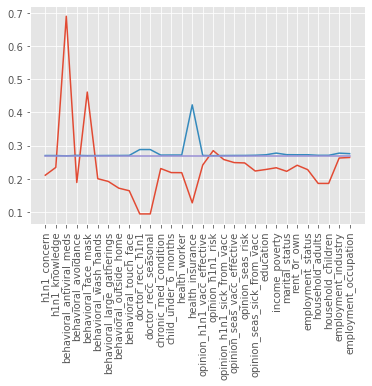

In [188]:
orig_ratio = len(training_df[training_df['h1n1_vaccine']==1].index)/len(training_df[training_df['h1n1_vaccine']==0].index)
plt.xticks(rotation=90)
plt.plot(column_name, h1n1_ratio_null)
plt.plot(column_name, h1n1_ratio_no_null)
plt.plot(column_name, [orig_ratio]*len(column_name));

In [189]:
column_name = []
flu_ratio_null = []
flu_ratio_no_null = []
flu_ratio = []
for c in training_df.columns:
    yes_flu_null = sum(training_df[training_df[c].isnull()]["seasonal_vaccine"]==1)
    no_flu_null = sum(training_df[training_df[c].isnull()]["seasonal_vaccine"]==0)
    
    yes_flu_no_null = sum(training_df[training_df[c].isnull() == False]["seasonal_vaccine"]==1)
    no_flu_no_null = sum(training_df[training_df[c].isnull() == False]["seasonal_vaccine"]==0)
    
    if no_flu_null > 0:
        column_name.append(c)
        flu_ratio_no_null.append(yes_flu_no_null/no_flu_no_null)
        flu_ratio_null.append(yes_flu_null/no_flu_null)

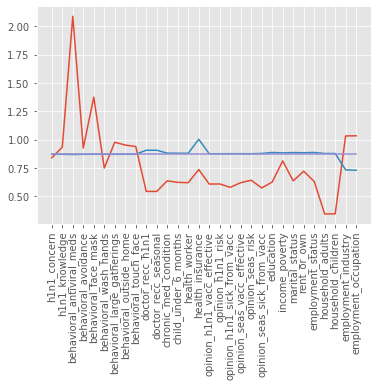

In [190]:
orig_ratio = len(training_df[training_df['seasonal_vaccine']==1].index)/len(training_df[training_df['seasonal_vaccine']==0].index)
plt.xticks(rotation=90)
plt.plot(column_name, flu_ratio_null)
plt.plot(column_name, flu_ratio_no_null)
plt.plot(column_name, [orig_ratio]*len(column_name));

# so health insur and doc recc n/a's do affect our ratios

In [191]:
got_h1n1 = training_df[training_df['h1n1_vaccine']==1]
no_h1n1 = training_df[training_df['h1n1_vaccine']==0]
got_flu = training_df[training_df['seasonal_vaccine']==1]
no_flu = training_df[training_df['seasonal_vaccine']==0]

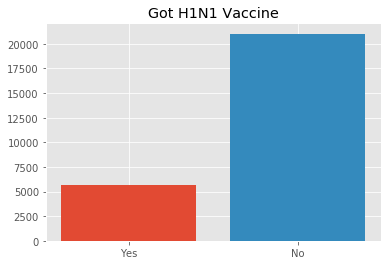

In [192]:
plt.title("Got H1N1 Vaccine")
plt.bar('Yes', len(got_h1n1.index))
plt.bar('No', len(no_h1n1.index));

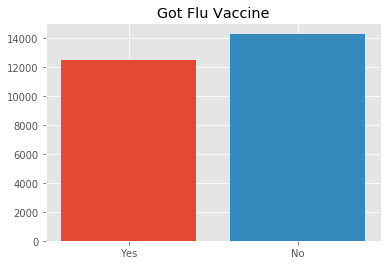

In [193]:
plt.title("Got Flu Vaccine")
plt.bar('Yes', len(got_flu.index))
plt.bar('No', len(no_flu.index));

So it looks like half the people got the flu vaccine, and much less got the h1n1 vaccine

Lets remove all n/a's and see what the breakdown is

In [194]:
training_no_na = training_df.dropna()

In [195]:
got_h1n1 = training_no_na[training_no_na['h1n1_vaccine']==1]
no_h1n1 = training_no_na[training_no_na['h1n1_vaccine']==0]
got_flu = training_no_na[training_no_na['seasonal_vaccine']==1]
no_flu = training_no_na[training_no_na['seasonal_vaccine']==0]

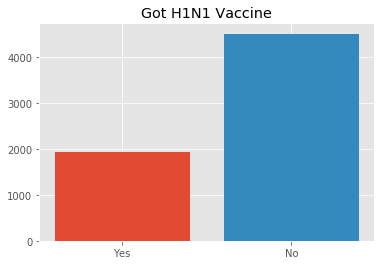

In [196]:
plt.title("Got H1N1 Vaccine")
plt.bar('Yes', len(got_h1n1.index))
plt.bar('No', len(no_h1n1.index));

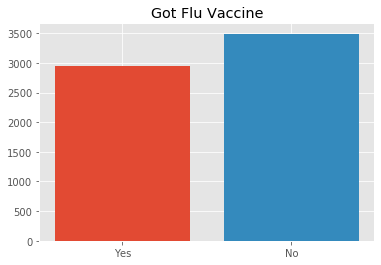

In [197]:
plt.title("Got Flu Vaccine")
plt.bar('Yes', len(got_flu.index))
plt.bar('No', len(no_flu.index));

The H1N1 relationship is way different

In [198]:
na_got_h1n1 = training_df[(training_df['health_insurance'].isna()) & (training_df['h1n1_vaccine']==1)]
na_no_h1n1 = training_df[(training_df['health_insurance'].isna()) & (training_df['h1n1_vaccine']==0)]

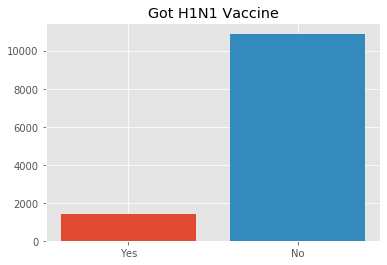

In [199]:
plt.title("Got H1N1 Vaccine")
plt.bar('Yes', len(na_got_h1n1.index))
plt.bar('No', len(na_no_h1n1.index));

if health insurance is n/a then they are very likely to not have h1n1

In [200]:
print("Percent of n/a health insurance that got h1n1: ", len(na_got_h1n1.index)/(len(na_got_h1n1.index)+len(na_no_h1n1.index)))
print("Percent of all that got h1n1: ", len(got_h1n1.index)/(len(got_h1n1.index)+len(no_h1n1.index)))

Percent of n/a health insurance that got h1n1:  0.11275867687795339
Percent of all that got h1n1:  0.30060587230076125


So a lot of the n/a's in health insurance actually affect the h1n1, lets make that column dummy

# make dummies for health insur and doctor rec

In [201]:
training_df_1 = pd.get_dummies(training_df, columns=['health_insurance'], dummy_na=True)
training_df_1 = pd.get_dummies(training_df_1, columns=['doctor_recc_h1n1'], dummy_na=True)
training_df_1 = pd.get_dummies(training_df_1, columns=['doctor_recc_seasonal'], dummy_na=True)

In [202]:
training_df_1.dropna().shape

(11626, 44)

Ok there are still quite a few rows with n/a (16K) so lets focus on employment_industry and employment_occupation

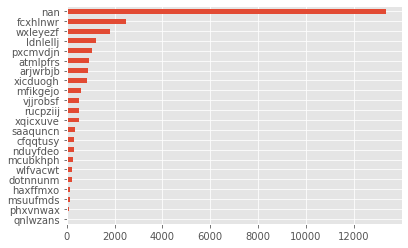

In [203]:
training_df_1.employment_industry.value_counts(dropna=False).sort_values().plot(kind = 'barh')

In [204]:
na_got_h1n1 = training_df[(training_df['employment_industry'].isna()) & (training_df['h1n1_vaccine']==1)]
na_no_h1n1 = training_df[(training_df['employment_industry'].isna()) & (training_df['h1n1_vaccine']==0)]

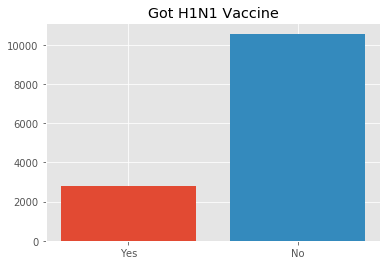

In [205]:
plt.title("Got H1N1 Vaccine")
plt.bar('Yes', len(na_got_h1n1.index))
plt.bar('No', len(na_no_h1n1.index));

In [206]:
print("Percent of n/a employment that got h1n1: ", len(na_got_h1n1.index)/(len(na_got_h1n1.index)+len(na_no_h1n1.index)))
print("Percent of all that got h1n1: ", len(got_h1n1.index)/(len(got_h1n1.index)+len(no_h1n1.index)))

Percent of n/a employment that got h1n1:  0.20787696924231058
Percent of all that got h1n1:  0.30060587230076125


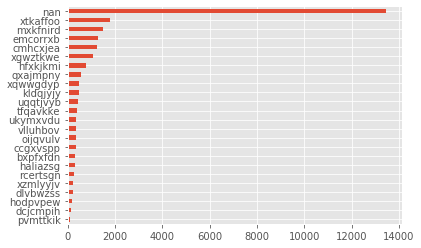

In [207]:
training_df_1.employment_occupation.value_counts(dropna=False).sort_values().plot(kind = 'barh')

im going to drop the employment columns

In [231]:
no_occup_df = training_df_1.drop(labels=["employment_occupation", "employment_industry"], axis=1)

In [232]:
no_occup_df.dropna().shape[0] / training_df.shape[0]

0.7922642003968997

So we dropped about 20% of rows. ok for now

# lets look at categorical values

In [233]:
no_occup_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine',
       'health_insurance_0.0', 'health_insurance_1.0', 'health_insurance_nan',
       'doctor_recc_h1n1_0.0', 'doctor_recc_h1n1_1.0', 'doctor_recc_h1n1_nan',
       'doctor_recc_seasonal_0.0', 'doctor_recc_seasonal_1.0',
    

In [234]:
no_occup_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,health_insurance_0.0,health_insurance_1.0,health_insurance_nan,doctor_recc_h1n1_0.0,doctor_recc_h1n1_1.0,doctor_recc_h1n1_nan,doctor_recc_seasonal_0.0,doctor_recc_seasonal_1.0,doctor_recc_seasonal_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1,0,1,0,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0,0,0,1,0,0,1,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1,0,0,1,1,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0,0,0,1,1,0,0,1,0,0


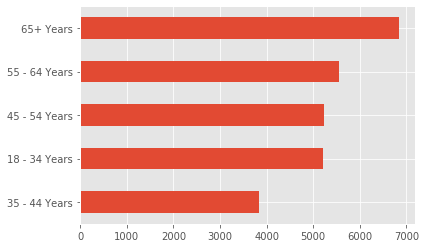

In [235]:
no_occup_df.age_group.value_counts(dropna=False).sort_values().plot(kind = 'barh')

In [236]:
age_mapper = {"65+ Years": 65, "55 - 64 Years": 55, "45 - 54 Years": 45, "18 - 34 Years": 18, "35 - 44 Years": 35}
no_occup_df["age_group"] = no_occup_df["age_group"].map(age_mapper)
no_occup_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,health_insurance_0.0,health_insurance_1.0,health_insurance_nan,doctor_recc_h1n1_0.0,doctor_recc_h1n1_1.0,doctor_recc_h1n1_nan,doctor_recc_seasonal_0.0,doctor_recc_seasonal_1.0,doctor_recc_seasonal_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1,0,1,0,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0,0,0,1,0,0,1,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1,0,0,1,1,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0,0,0,1,1,0,0,1,0,0


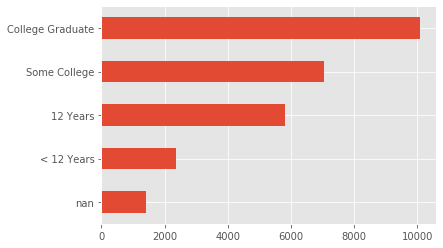

In [237]:
no_occup_df.education.value_counts(dropna=False).sort_values().plot(kind = 'barh')

In [244]:
education_mapper = {"< 12 Years": 10, "12 Years": 12, "Some College": 14, "College Graduate": 16}
no_occup_df["education"] = no_occup_df["education"].map(education_mapper)
no_occup_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,health_insurance_0.0,health_insurance_1.0,health_insurance_nan,doctor_recc_h1n1_0.0,doctor_recc_h1n1_1.0,doctor_recc_h1n1_nan,doctor_recc_seasonal_0.0,doctor_recc_seasonal_1.0,doctor_recc_seasonal_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55,10.0,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0,0,1,0,1,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35,12.0,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1,0,1,0,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18,16.0,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0,0,0,1,0,0,1,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65,12.0,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1,0,0,1,1,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45,14.0,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0,0,0,1,1,0,0,1,0,0


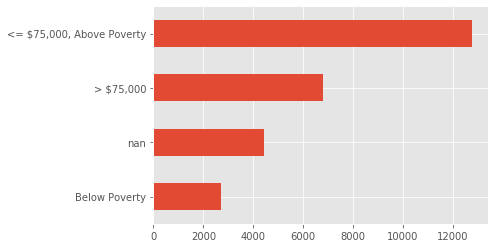

In [245]:
no_occup_df.income_poverty.value_counts(dropna=False).sort_values().plot(kind = 'barh')

In [247]:
no_occup_df = pd.get_dummies(no_occup_df, columns=['income_poverty'], dummy_na=True)

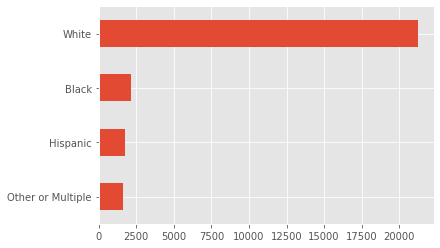

In [248]:
no_occup_df.race.value_counts(dropna=False).sort_values().plot(kind = 'barh')

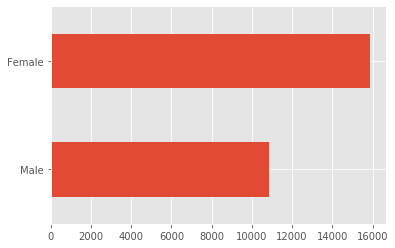

In [249]:
no_occup_df.sex.value_counts(dropna=False).sort_values().plot(kind = 'barh')

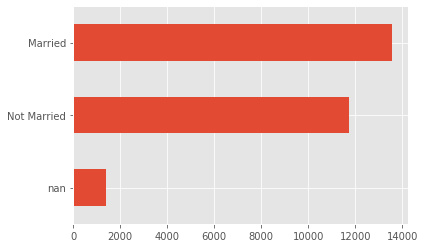

In [221]:
no_occup_df.marital_status.value_counts(dropna=False).sort_values().plot(kind = 'barh')

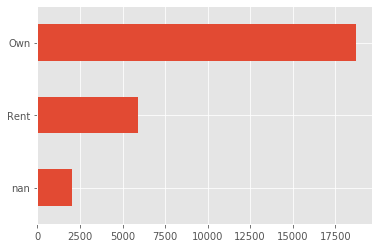

In [222]:
no_occup_df.rent_or_own.value_counts(dropna=False).sort_values().plot(kind = 'barh')

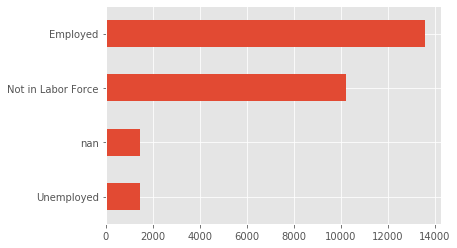

In [223]:
no_occup_df.employment_status.value_counts(dropna=False).sort_values().plot(kind = 'barh')

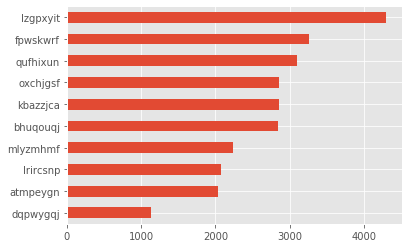

In [224]:
no_occup_df.hhs_geo_region.value_counts(dropna=False).sort_values().plot(kind = 'barh')

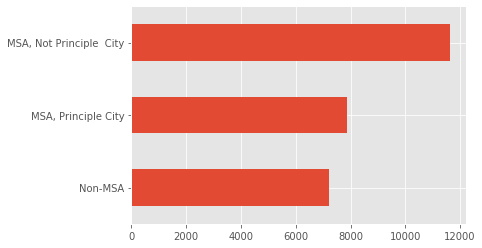

In [225]:
no_occup_df.census_msa.value_counts(dropna=False).sort_values().plot(kind = 'barh')

In [266]:
final_df = pd.get_dummies(no_occup_df, drop_first=True).dropna()

In [267]:
final_df.shape[0]/training_df.shape[0]

0.9091249485153705

In [268]:
pd.to_pickle(final_df, "full_clean_df.pkl")

In [210]:
# As usual, create our train/test split
# This will become particularly important as we calculate our error metrics

X_train, X_test, label_train, label_test = train_test_split(training_features, training_labels["seasonal_vaccine"], test_size=0.3, random_state=41)

In [211]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, label_train)

ValueError: could not convert string to float: '35 - 44 Years'